# Car Price Prediction Project

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import  matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',None)

# Loading data

In [2]:
df=pd.read_excel("car_price_data.xlsx")
df

Unnamed: 0  Unnamed: 0.1                  Brand                 Varient  \
0              0             0       2016 Maruti Eeco        5 Seater AC BSIV   
1              1             1  2018 Volkswagen Vento        1.5 TDI Highline   
2              2             2       2017 Honda Amaze         S Option i-VTEC   
3              3             3        2018 Honda City                i-VTEC V   
4              4             4    2014 Maruti Wagon R                     VXI   
...          ...           ...                    ...                     ...   
5488        5488          1140     2013 Skoda Octavia     Ambition 1.8 TSI AT   
5489        5489          1141      2015 Skoda Superb  Elegance 2.0 TDI CR AT   
5490        5490          1142     2009 Toyota Innova   2.5 V Diesel 8-seater   
5491        5491          1143       2011 Maruti Alto                     LXi   
5492        5492          1144     2015 Hyundai Verna       1.6 VTVT S Option   

     Transmission         Owner     KiloMeter    Fuel Year_of_purchase  \
0          Manual            --    45,347 kms  Petrol               --   
1          Manual            --    97,922 kms  Diesel               --   
2          Manual            --    59,642 kms  Petrol               --   
3          Manual            --    89,144 kms  Petrol               --   
4          Manual            --  1,31,125 kms  Petrol               --   
...           ...           ...           ...     ...              ...   
5488    Automatic   First Owner    50,000 kms  Petrol             2013   
5489    Automatic  Second Owner    60,200 kms  Diesel             2015   
5490       Manual   First Owner  1,74,855 kms  Diesel             2009   
5491       Manual  Second Owner  2,25,000 kms  Petrol             2011   
5492       Manual   First Owner    92,207 kms  Petrol             2015   

       Location      Price  
0     Ahmedabad   3.5 Lakh  
1     Ahmedabad  6.99 Lakh  
2     Ahmedabad  5.53 Lakh  
3     Ahmedabad  7.64 Lakh  
4     Ahmedabad  2.94 Lakh  
...         ...        ...  
5488        NaN   6.5 Lakh  
5489        NaN  13.5 Lakh  
5490        NaN  4.85 Lakh  
5491        NaN   1.5 Lakh  
5492        NaN  6.25 Lakh  

[5493 rows x 11 columns]

In [3]:
df.shape

(5493, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5493 entries, 0 to 5492
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        5493 non-null   int64 
 1   Unnamed: 0.1      5493 non-null   int64 
 2   Brand             5493 non-null   object
 3   Varient           5493 non-null   object
 4   Transmission      5493 non-null   object
 5   Owner             5493 non-null   object
 6   KiloMeter         5493 non-null   object
 7   Fuel              5493 non-null   object
 8   Year_of_purchase  5493 non-null   object
 9   Location          4148 non-null   object
 10  Price             5493 non-null   object
dtypes: int64(2), object(9)
memory usage: 472.2+ KB


In [5]:
df.isnull().sum()

Unnamed: 0             0
Unnamed: 0.1           0
Brand                  0
Varient                0
Transmission           0
Owner                  0
KiloMeter              0
Fuel                   0
Year_of_purchase       0
Location            1345
Price                  0
dtype: int64

In [6]:
df.drop(['Unnamed: 0'],axis = 1,inplace = True)
df.head(5)

Unnamed: 0.1                  Brand           Varient Transmission Owner  \
0             0       2016 Maruti Eeco  5 Seater AC BSIV       Manual    --   
1             1  2018 Volkswagen Vento  1.5 TDI Highline       Manual    --   
2             2       2017 Honda Amaze   S Option i-VTEC       Manual    --   
3             3        2018 Honda City          i-VTEC V       Manual    --   
4             4    2014 Maruti Wagon R               VXI       Manual    --   

      KiloMeter    Fuel Year_of_purchase   Location      Price  
0    45,347 kms  Petrol               --  Ahmedabad   3.5 Lakh  
1    97,922 kms  Diesel               --  Ahmedabad  6.99 Lakh  
2    59,642 kms  Petrol               --  Ahmedabad  5.53 Lakh  
3    89,144 kms  Petrol               --  Ahmedabad  7.64 Lakh  
4  1,31,125 kms  Petrol               --  Ahmedabad  2.94 Lakh

In [7]:
df.drop(['Unnamed: 0.1'],axis = 1,inplace = True)
df.head(5)

Brand           Varient Transmission Owner     KiloMeter  \
0       2016 Maruti Eeco  5 Seater AC BSIV       Manual    --    45,347 kms   
1  2018 Volkswagen Vento  1.5 TDI Highline       Manual    --    97,922 kms   
2       2017 Honda Amaze   S Option i-VTEC       Manual    --    59,642 kms   
3        2018 Honda City          i-VTEC V       Manual    --    89,144 kms   
4    2014 Maruti Wagon R               VXI       Manual    --  1,31,125 kms   

     Fuel Year_of_purchase   Location      Price  
0  Petrol               --  Ahmedabad   3.5 Lakh  
1  Diesel               --  Ahmedabad  6.99 Lakh  
2  Petrol               --  Ahmedabad  5.53 Lakh  
3  Petrol               --  Ahmedabad  7.64 Lakh  
4  Petrol               --  Ahmedabad  2.94 Lakh

In [8]:
df.nunique()

Brand               1004
Varient             1353
Transmission           2
Owner                  6
KiloMeter           2490
Fuel                   5
Year_of_purchase      24
Location               8
Price                871
dtype: int64

In [9]:
df['Year_of_purchase'].value_counts()

--      1474
2016     405
2018     403
2017     396
2012     387
2015     386
2014     376
2013     371
2011     330
2010     241
2019     201
2020     139
2009     139
2008      98
2007      50
2021      38
2006      20
2005      14
2003       9
2004       6
2002       4
2000       3
2001       2
1986       1
Name: Year_of_purchase, dtype: int64

In [10]:
df['Owner'].value_counts()

First Owner             2870
--                      1474
Second Owner             992
Third Owner              129
Fourth & Above Owner      19
Test Drive Car             9
Name: Owner, dtype: int64

In [11]:
df['Fuel'].value_counts()

Petrol      3142
Diesel      2292
CNG           46
LPG           10
Electric       3
Name: Fuel, dtype: int64

In [12]:
df['Price'].value_counts()

4.5 Lakh      82
4 Lakh        78
5 Lakh        68
4.25 Lakh     68
5.75 Lakh     68
              ..
1.88 Lakh      1
13.81 Lakh     1
6.02 Lakh      1
8.06 Lakh      1
9.31 Lakh      1
Name: Price, Length: 871, dtype: int64

In [13]:
df['Brand'].value_counts()

2015 Hyundai i20             53
2013 Hyundai i10             47
2015 Hyundai Grand i10       43
2011 Hyundai i10             42
2013 Hyundai i20             41
                             ..
2021 Toyota Innova Crysta     1
2005 Honda Accord             1
2020 Skoda Superb             1
2014 Datsun GO                1
2003 Fiat Palio               1
Name: Brand, Length: 1004, dtype: int64

## Find missing values in data set

In [14]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

Brand                0.000000
Varient              0.000000
Transmission         0.000000
Owner                0.000000
KiloMeter            0.000000
Fuel                 0.000000
Year_of_purchase     0.000000
Location            24.485709
Price                0.000000
dtype: float64

As we can see there is 24.48 percent missing values in Location columns

In [15]:
# identify variables with '--' values
unknowns = {}
for i in list(df.columns):
    if (df[i]).dtype == object:
        j = np.sum(df[i] == "--")
        unknowns[i] = j
unknowns = pd.DataFrame.from_dict(unknowns, orient = 'index')
print(unknowns)

                     0
Brand                0
Varient              0
Transmission         0
Owner             1474
KiloMeter            0
Fuel                 0
Year_of_purchase  1474
Location             0
Price                0


In [16]:
df.Owner.value_counts()

First Owner             2870
--                      1474
Second Owner             992
Third Owner              129
Fourth & Above Owner      19
Test Drive Car             9
Name: Owner, dtype: int64

In [17]:
df.Year_of_purchase.value_counts()

--      1474
2016     405
2018     403
2017     396
2012     387
2015     386
2014     376
2013     371
2011     330
2010     241
2019     201
2020     139
2009     139
2008      98
2007      50
2021      38
2006      20
2005      14
2003       9
2004       6
2002       4
2000       3
2001       2
1986       1
Name: Year_of_purchase, dtype: int64

### **Data** **Visualization**

<AxesSubplot:>

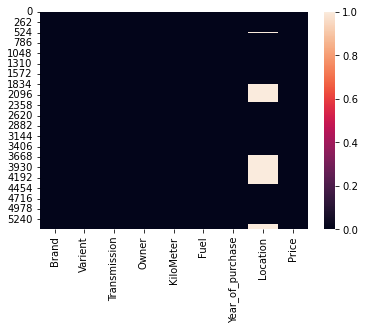

In [18]:
sns.heatmap(df.isnull())

In [19]:
fig=plt.figure(figsize=(10,6))
ax = df.groupby('Fuel').Price.count().plot.bar(ylim=0)
ax.set_ylabel('Price')
plt.show()

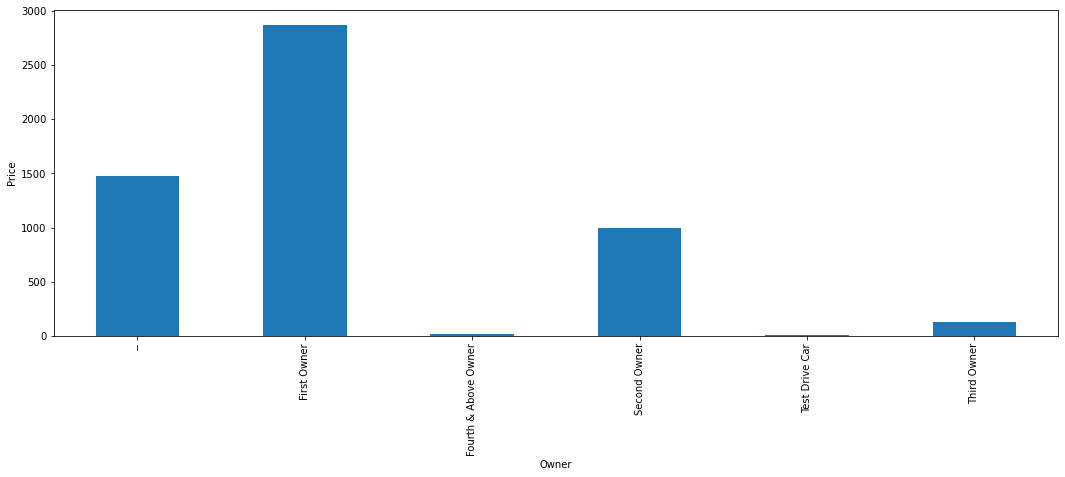

In [20]:
fig = plt.figure(figsize=(18,6))
ax = df.groupby('Owner').Price.count().plot.bar(ylim=0)
ax.set_ylabel('Price')
plt.show()

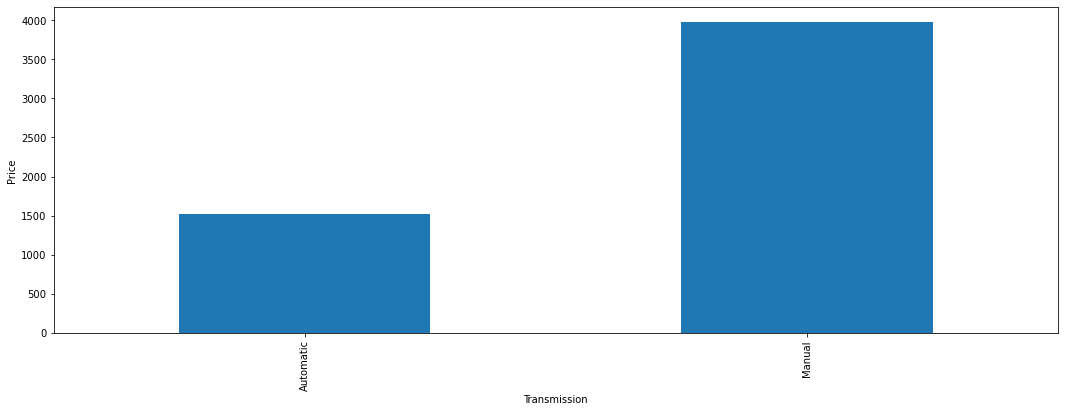

In [21]:
fig = plt.figure(figsize=(18,6))
ax = df.groupby('Transmission').Price.count().plot.bar(ylim=0)
ax.set_ylabel('Price')
plt.show()

In [22]:
fig = plt.figure(figsize=(18,6))
ax = df.groupby('Year_of_purchase').Price.count().plot.bar(ylim=0)
ax.set_ylabel('Price')
plt.show()

There 25 percent of dataset which is unknown we need to take of it in data pre-processing.

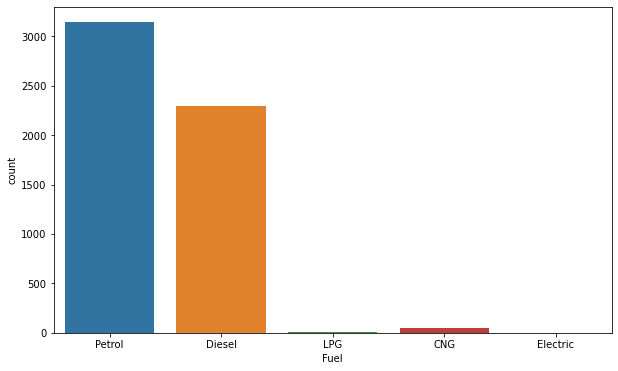

In [23]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='Fuel', data=df)

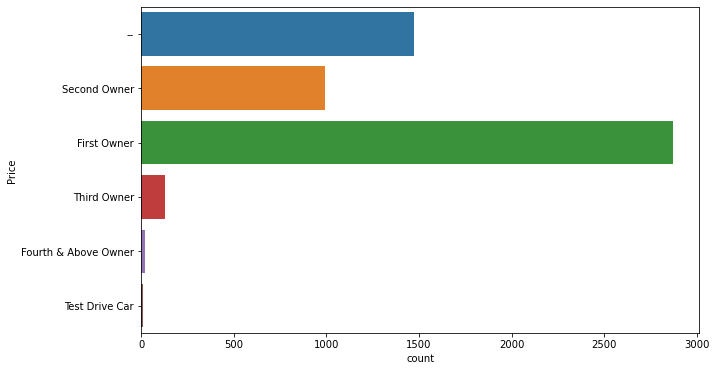

In [24]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(y = 'Owner', data=df) 
ax.set_ylabel('Price')
plt.show()

In [25]:
#fig = plt.figure(figsize=(10,6))
fig = plt.figure(figsize=(10,6))

ax = sns.countplot(x='Brand', data=df)
plt.show()

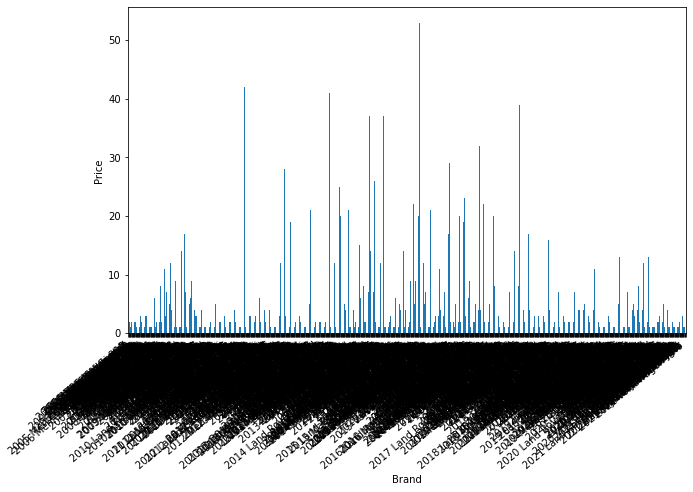

In [26]:
fig = plt.figure(figsize=(10,6))
ax= df.groupby('Brand').Price.count().plot.bar(ylim=0)
ax.set_ylabel('Price')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [27]:
df['Owner']=df['Owner'].str.replace('--','Third Owner')
df

Brand                 Varient Transmission  \
0          2016 Maruti Eeco        5 Seater AC BSIV       Manual   
1     2018 Volkswagen Vento        1.5 TDI Highline       Manual   
2          2017 Honda Amaze         S Option i-VTEC       Manual   
3           2018 Honda City                i-VTEC V       Manual   
4       2014 Maruti Wagon R                     VXI       Manual   
...                     ...                     ...          ...   
5488     2013 Skoda Octavia     Ambition 1.8 TSI AT    Automatic   
5489      2015 Skoda Superb  Elegance 2.0 TDI CR AT    Automatic   
5490     2009 Toyota Innova   2.5 V Diesel 8-seater       Manual   
5491       2011 Maruti Alto                     LXi       Manual   
5492     2015 Hyundai Verna       1.6 VTVT S Option       Manual   

             Owner     KiloMeter    Fuel Year_of_purchase   Location  \
0      Third Owner    45,347 kms  Petrol               --  Ahmedabad   
1      Third Owner    97,922 kms  Diesel               --  Ahmedabad   
2      Third Owner    59,642 kms  Petrol               --  Ahmedabad   
3      Third Owner    89,144 kms  Petrol               --  Ahmedabad   
4      Third Owner  1,31,125 kms  Petrol               --  Ahmedabad   
...            ...           ...     ...              ...        ...   
5488   First Owner    50,000 kms  Petrol             2013        NaN   
5489  Second Owner    60,200 kms  Diesel             2015        NaN   
5490   First Owner  1,74,855 kms  Diesel             2009        NaN   
5491  Second Owner  2,25,000 kms  Petrol             2011        NaN   
5492   First Owner    92,207 kms  Petrol             2015        NaN   

          Price  
0      3.5 Lakh  
1     6.99 Lakh  
2     5.53 Lakh  
3     7.64 Lakh  
4     2.94 Lakh  
...         ...  
5488   6.5 Lakh  
5489  13.5 Lakh  
5490  4.85 Lakh  
5491   1.5 Lakh  
5492  6.25 Lakh  

[5493 rows x 9 columns]

In [28]:
df['Year_of_purchase'] = df['Year_of_purchase'].str.replace('--','2020')
df.head(5)

Brand           Varient Transmission        Owner  \
0       2016 Maruti Eeco  5 Seater AC BSIV       Manual  Third Owner   
1  2018 Volkswagen Vento  1.5 TDI Highline       Manual  Third Owner   
2       2017 Honda Amaze   S Option i-VTEC       Manual  Third Owner   
3        2018 Honda City          i-VTEC V       Manual  Third Owner   
4    2014 Maruti Wagon R               VXI       Manual  Third Owner   

      KiloMeter    Fuel Year_of_purchase   Location      Price  
0    45,347 kms  Petrol             2020  Ahmedabad   3.5 Lakh  
1    97,922 kms  Diesel             2020  Ahmedabad  6.99 Lakh  
2    59,642 kms  Petrol             2020  Ahmedabad  5.53 Lakh  
3    89,144 kms  Petrol             2020  Ahmedabad  7.64 Lakh  
4  1,31,125 kms  Petrol             2020  Ahmedabad  2.94 Lakh

In [29]:
unknowns = {}
for i in list(df.columns):
    if (df[i]).dtype == object:
        j = np.sum(df[i] == "--")
        unknowns[i] = j
unknowns = pd.DataFrame.from_dict(unknowns, orient = 'index')
print(unknowns)

                  0
Brand             0
Varient           0
Transmission      0
Owner             0
KiloMeter         0
Fuel              0
Year_of_purchase  0
Location          0
Price             0


In [30]:
from statistics import mode

In [31]:
df['Location'] = df['Location'].fillna(value = mode(df['Location']))
df.head(60)

Brand                     Varient Transmission  \
0            2016 Maruti Eeco            5 Seater AC BSIV       Manual   
1       2018 Volkswagen Vento            1.5 TDI Highline       Manual   
2            2017 Honda Amaze             S Option i-VTEC       Manual   
3             2018 Honda City                    i-VTEC V       Manual   
4         2014 Maruti Wagon R                         VXI       Manual   
5     2019 Maruti Swift Dzire                     VXI 1.2       Manual   
6          2013 Toyota Innova    2.5 VX (Diesel) 8 Seater       Manual   
7         2016 Nissan Terrano               XL Plus 85 PS       Manual   
8            2020 Maruti Eeco                 5 Seater AC       Manual   
9         2013 Maruti Wagon R                   LXI BS IV       Manual   
10         2017 Maruti Baleno                       Alpha       Manual   
11         2017 Maruti Baleno                       Delta       Manual   
12           2012 Maruti Eeco                 5 Seater AC       Manual   
13    2015 Maruti Swift Dzire                         VDI       Manual   
14         2012 Toyota Innova    2.5 GX (Diesel) 8 Seater       Manual   
15          2018 Maruti Swift                     AMT VDI    Automatic   
16          2014 Maruti Swift                    VDI BSIV       Manual   
17            2019 Tata Nexon        1.5 Revotorq XZ Plus       Manual   
18        2016 Chevrolet Beat                   Diesel LT       Manual   
19    2017 Maruti SX4 S Cross           Alpha DDiS 200 SH       Manual   
20           2019 Maruti Eeco            5 Seater AC BSIV       Manual   
21     2015 Hyundai Grand i10                        Asta       Manual   
22        2017 Maruti Wagon R                    VXI Plus       Manual   
23           2017 Maruti Eeco                 5 Seater AC       Manual   
24           2020 Maruti Eeco                 5 Seater AC       Manual   
25         2014 Hyundai Verna             1.6 SX CRDi (O)       Manual   
26    2012 Maruti Swift Dzire                         VDI       Manual   
27       2019 Maruti S-Presso                         VXI       Manual   
28        2011 Maruti Wagon R                   LXI BS IV       Manual   
29          2018 Maruti Swift                         VDI       Manual   
30          2013 Maruti Swift                         ZDi       Manual   
31        2017 Maruti Wagon R                     AMT VXI    Automatic   
32    2019 Maruti Swift Dzire                     VXI 1.2       Manual   
33          2016 Maruti Swift                VXI Optional       Manual   
34         2016 Maruti Baleno                   1.2 Delta       Manual   
35       2012 Maruti Alto K10                         LXI       Manual   
36        2014 Maruti Wagon R                         VXI       Manual   
37        2016 Maruti Wagon R                         VXI       Manual   
38        2020 Maruti Wagon R                         LXI       Manual   
39    2019 Maruti Swift Dzire                     VXI 1.2       Manual   
40        2015 Maruti Wagon R                         LXI       Manual   
41     2013 Tata Indica Vista                Quadrajet VX       Manual   
42        2006 Maruti Wagon R                   LXI BSIII       Manual   
43        2009 Maruti Wagon R                    LX BSIII       Manual   
44         2017 Maruti Baleno                Delta Diesel       Manual   
45        2012 Maruti Wagon R                         LXI       Manual   
46         2016 Mahindra Thar                      DI 4X4       Manual   
47           2017 Hyundai i20              Magna 1.4 CRDi       Manual   
48         2013 Hyundai Verna             1.6 SX CRDi (O)       Manual   
49    2013 Maruti Swift Dzire                         VDI       Manual   
50        2015 Maruti Wagon R                   LXI BS IV       Manual   
51           2008 Maruti Alto                         LXi       Manual   
52        2019 Hyundai Santro                      Sportz       Manual   
53      2012 Volkswagen Vent

In [32]:
df['KiloMeter'] = df['KiloMeter'].str.replace('kms',' ')
df.head(5)

Brand           Varient Transmission        Owner  \
0       2016 Maruti Eeco  5 Seater AC BSIV       Manual  Third Owner   
1  2018 Volkswagen Vento  1.5 TDI Highline       Manual  Third Owner   
2       2017 Honda Amaze   S Option i-VTEC       Manual  Third Owner   
3        2018 Honda City          i-VTEC V       Manual  Third Owner   
4    2014 Maruti Wagon R               VXI       Manual  Third Owner   

    KiloMeter    Fuel Year_of_purchase   Location      Price  
0    45,347    Petrol             2020  Ahmedabad   3.5 Lakh  
1    97,922    Diesel             2020  Ahmedabad  6.99 Lakh  
2    59,642    Petrol             2020  Ahmedabad  5.53 Lakh  
3    89,144    Petrol             2020  Ahmedabad  7.64 Lakh  
4  1,31,125    Petrol             2020  Ahmedabad  2.94 Lakh

In [33]:
df['Price'] = df['Price'].str.replace('Cr','')
df.head(5)

Brand           Varient Transmission        Owner  \
0       2016 Maruti Eeco  5 Seater AC BSIV       Manual  Third Owner   
1  2018 Volkswagen Vento  1.5 TDI Highline       Manual  Third Owner   
2       2017 Honda Amaze   S Option i-VTEC       Manual  Third Owner   
3        2018 Honda City          i-VTEC V       Manual  Third Owner   
4    2014 Maruti Wagon R               VXI       Manual  Third Owner   

    KiloMeter    Fuel Year_of_purchase   Location      Price  
0    45,347    Petrol             2020  Ahmedabad   3.5 Lakh  
1    97,922    Diesel             2020  Ahmedabad  6.99 Lakh  
2    59,642    Petrol             2020  Ahmedabad  5.53 Lakh  
3    89,144    Petrol             2020  Ahmedabad  7.64 Lakh  
4  1,31,125    Petrol             2020  Ahmedabad  2.94 Lakh

In [34]:
df['Brand'] = df['Brand'].str.replace('2003',' ')
df['Brand'] = df['Brand'].str.replace('2005',' ')
df['Brand'] = df['Brand'].str.replace('2011',' ')
df['Brand'] = df['Brand'].str.replace('2013',' ')
df['Brand'] = df['Brand'].str.replace('2014',' ')
df['Brand'] = df['Brand'].str.replace('2015',' ')
df['Brand'] = df['Brand'].str.replace('2016',' ')
df['Brand'] = df['Brand'].str.replace('2017',' ')
df['Brand'] = df['Brand'].str.replace('2018',' ')
df['Brand'] = df['Brand'].str.replace('2019',' ')
df['Brand'] = df['Brand'].str.replace('2020',' ')
df['Brand'] = df['Brand'].str.replace('2021',' ')

df.head(5)

Brand           Varient Transmission        Owner   KiloMeter  \
0         Maruti Eeco  5 Seater AC BSIV       Manual  Third Owner    45,347     
1    Volkswagen Vento  1.5 TDI Highline       Manual  Third Owner    97,922     
2         Honda Amaze   S Option i-VTEC       Manual  Third Owner    59,642     
3          Honda City          i-VTEC V       Manual  Third Owner    89,144     
4      Maruti Wagon R               VXI       Manual  Third Owner  1,31,125     

     Fuel Year_of_purchase   Location      Price  
0  Petrol             2020  Ahmedabad   3.5 Lakh  
1  Diesel             2020  Ahmedabad  6.99 Lakh  
2  Petrol             2020  Ahmedabad  5.53 Lakh  
3  Petrol             2020  Ahmedabad  7.64 Lakh  
4  Petrol             2020  Ahmedabad  2.94 Lakh

In [35]:
df['Brand'].value_counts()

  Hyundai i20                     263
  Maruti Swift                    191
  Maruti Wagon R                  183
  Hyundai Grand i10               157
  Maruti Swift Dzire              149
                                 ... 
2000 Mitsubishi Lancer              1
2010 Fiat Punto                     1
2004 Ford Ikon                      1
2006 Mercedes-Benz New C-Class      1
  Fiat Palio                        1
Name: Brand, Length: 460, dtype: int64

In [36]:
df['Brand'] = df['Brand'].str.replace('2000',' ')
df['Brand'] = df['Brand'].str.replace('2010',' ')
df['Brand'] = df['Brand'].str.replace('2004',' ')
df['Brand'] = df['Brand'].str.replace('2006',' ')

df.head(5)

Brand           Varient Transmission        Owner   KiloMeter  \
0         Maruti Eeco  5 Seater AC BSIV       Manual  Third Owner    45,347     
1    Volkswagen Vento  1.5 TDI Highline       Manual  Third Owner    97,922     
2         Honda Amaze   S Option i-VTEC       Manual  Third Owner    59,642     
3          Honda City          i-VTEC V       Manual  Third Owner    89,144     
4      Maruti Wagon R               VXI       Manual  Third Owner  1,31,125     

     Fuel Year_of_purchase   Location      Price  
0  Petrol             2020  Ahmedabad   3.5 Lakh  
1  Diesel             2020  Ahmedabad  6.99 Lakh  
2  Petrol             2020  Ahmedabad  5.53 Lakh  
3  Petrol             2020  Ahmedabad  7.64 Lakh  
4  Petrol             2020  Ahmedabad  2.94 Lakh

In [37]:
df['Brand'] = df['Brand'].str.replace('2012',' ')

In [38]:
df['Brand'] = df['Brand'].str.replace('1986',' ')

In [39]:
df['Brand'] = df['Brand'].str.replace('2008',' ')

In [40]:
df['Brand'] = df['Brand'].str.replace('2007',' ')
df['Brand'] = df['Brand'].str.replace('2001',' ')

In [41]:
df['Brand'] = df['Brand'].str.replace('2002',' ')
df['Brand'] = df['Brand'].str.replace('2009',' ')

In [42]:
df['Brand'].value_counts()

  Hyundai i20               326
  Maruti Swift              245
  Maruti Wagon R            239
  Honda City                216
  Hyundai Grand i10         203
                           ... 
  BMW M2                      1
  Jaguar XE                   1
  Mahindra Bolero Pik-Up      1
  BMW M Series                1
  Fiat Palio                  1
Name: Brand, Length: 233, dtype: int64

In [43]:
df.sample(15)

Brand              Varient Transmission         Owner  \
2627            Hyundai i20  1.2 Magna Executive       Manual   Third Owner   
2747            Hyundai i20             Asta 1.2       Manual  Second Owner   
443      Maruti Swift Dzire                  VDI       Manual   First Owner   
4183                 BMW X3            xDrive20d    Automatic  Second Owner   
3997                 BMW X1     sDrive 20d xLine    Automatic  Second Owner   
2486            Hyundai i20           1.4 Sportz       Manual   Third Owner   
5275          Hyundai Verna       1.6 CRDi EX MT       Manual  Second Owner   
3926                Audi Q3  30 TFSI Premium FWD    Automatic   First Owner   
3198        Mahindra XUV500               W8 FWD       Manual   First Owner   
2593          Maruti Baleno         1.2 CVT Zeta    Automatic   Third Owner   
2584           Maruti Swift             VDI BSIV       Manual   Third Owner   
3957     Maruti Swift Dzire                  VXI       Manual   First Owner   
1133          Hyundai Verna   CRDi 1.6 SX Option       Manual   First Owner   
3296    Nissan Micra Active                   XV       Manual   First Owner   
4065                Audi A4              2.0 TDI    Automatic  Second Owner   

       KiloMeter    Fuel Year_of_purchase     Location       Price  
2627    10,607    Petrol             2020       Mumbai    5.5 Lakh  
2747    21,239    Petrol             2012         Pune    3.2 Lakh  
443     80,000    Diesel             2014    Ahmedabad    4.5 Lakh  
4183    45,000    Diesel             2011          NaN  14.95 Lakh  
3997    50,000    Diesel             2013          NaN  12.75 Lakh  
2486    52,681    Diesel             2020  Navi Mumbai   6.67 Lakh  
5275  1,00,000    Diesel             2012         Pune   3.75 Lakh  
3926    28,200    Petrol             2017          NaN     26 Lakh  
3198    72,000    Diesel             2012       Mumbai   5.95 Lakh  
2593    84,370    Petrol             2020       Mumbai   6.24 Lakh  
2584  1,17,010    Diesel             2020       Mumbai   4.15 Lakh  
3957    66,100    Petrol             2016          NaN   4.95 Lakh  
1133    26,000    Diesel             2018    Bangalore  12.75 Lakh  
3296    43,000    Petrol             2014       Mumbai      3 Lakh  
4065    55,001    Diesel             2012          NaN  10.45 Lakh

In [44]:
df['Owner'].value_counts()

First Owner             2870
Third Owner             1603
Second Owner             992
Fourth & Above Owner      19
Test Drive Car             9
Name: Owner, dtype: int64

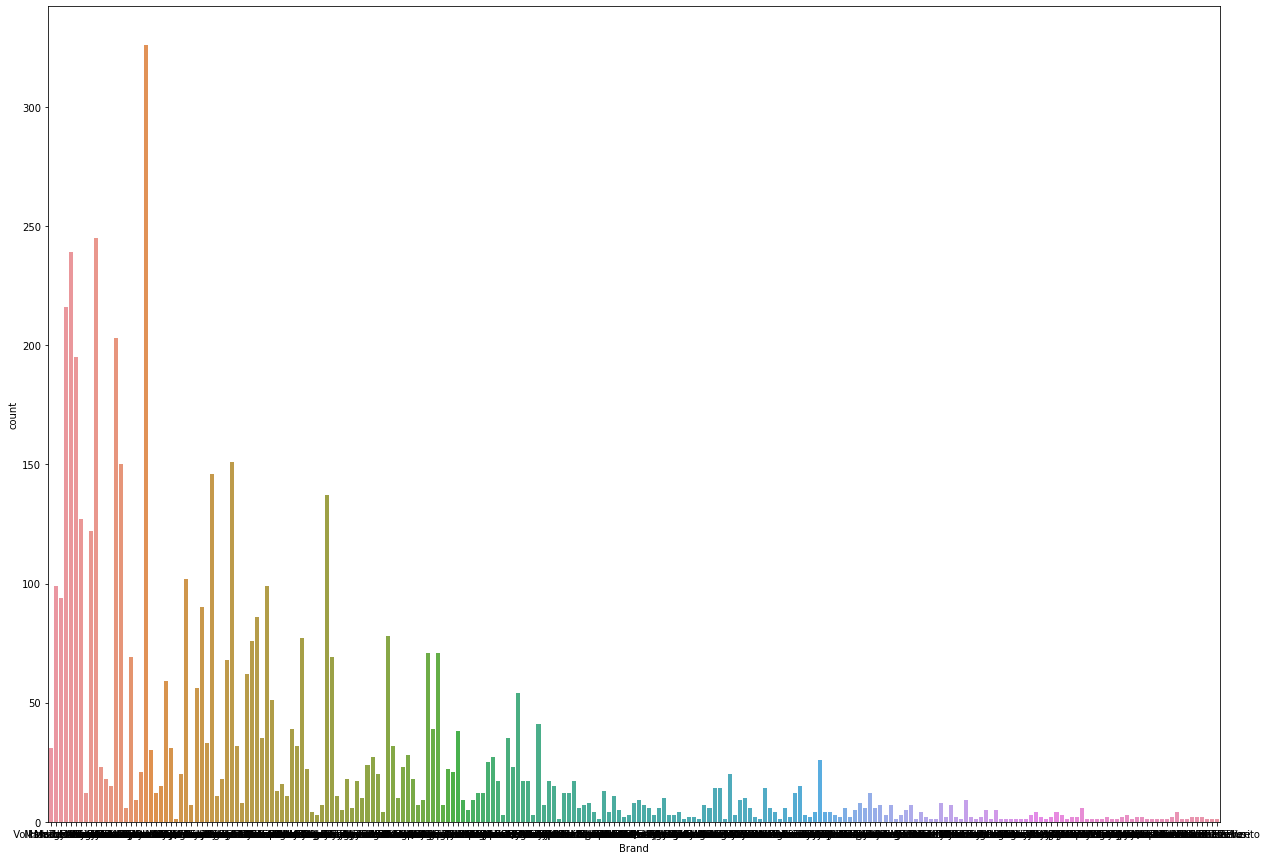

In [45]:
fig = plt.figure(figsize=(21,15))

ax = sns.countplot(x='Brand', data=df)
plt.show()

In [46]:
#ord_cols = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', \
#'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond']
#for col in Owner
df['Owner'].fillna(0, inplace=True)
df['Owner'].replace({'First Owner': 1, 'Second Owner': 2,'Third Owner': 3, 'Fourth & Above Owner': 4, 'Test Drive Car': 5 }, inplace=True)
df.sample(16)

Brand                                     Varient  \
1809             Ford Figo                             Diesel Titanium   
4428         Maruti Ertiga                                    SHVS VDI   
3266          Skoda Superb                         Elegance 1.8 TSI AT   
1123       Toyota Fortuner                             2.8 4WD MT BSIV   
4899           Maruti Ritz                                         VXi   
3379           Hyundai i20                                    1.2 Asta   
475     Maruti Swift Dzire                                         ZDi   
5183       Volkswagen Polo                                      GT TSI   
544           Renault KWID                        1.0 RXT AMT Opt BSIV   
2345           Maruti Ciaz                                    VDI SHVS   
876            Maruti Ciaz                                         ZXi   
4998           Hyundai i10                                         Era   
4660                BMW X5  xDrive 30d Design Pure Experience 5 Seater   
3361         Hyundai Verna                          1.6 SX CRDI (O) AT   
1644             Tata Hexa                                         XTA   
4019     Mercedes-Benz GLE                                        400d   

     Transmission  Owner   KiloMeter    Fuel Year_of_purchase     Location  \
1809       Manual      1    77,000    Diesel             2011    Bangalore   
4428       Manual      3    85,592    Diesel             2020         Pune   
3266    Automatic      2    50,000    Petrol             2013       Mumbai   
1123       Manual      1  1,25,000    Diesel             2018    Bangalore   
4899       Manual      3    82,000    Petrol             2009         Pune   
3379       Manual      2    69,000    Petrol             2011       Mumbai   
475        Manual      2  1,95,642    Diesel             2012    Ahmedabad   
5183    Automatic      1    61,000    Petrol             2015         Pune   
544     Automatic      3    53,913    Petrol             2020    Bangalore   
2345       Manual      3  1,10,174    Diesel             2020       Mumbai   
876        Manual      3  1,44,343    Petrol             2020    Bangalore   
4998       Manual      3    61,000    Petrol             2011         Pune   
4660    Automatic      1    70,000    Diesel             2016         Pune   
3361    Automatic      1    53,121    Diesel             2013  Navi Mumbai   
1644    Automatic      1    64,513    Diesel             2018    Bangalore   
4019    Automatic      1    16,500    Diesel             2020          NaN   

           Price  
1809    3.1 Lakh  
4428    7.5 Lakh  
3266   5.75 Lakh  
1123   31.5 Lakh  
4899   1.95 Lakh  
3379    3.1 Lakh  
475     2.5 Lakh  
5183   5.65 Lakh  
544    3.57 Lakh  
2345   5.15 Lakh  
876     4.9 Lakh  
4998   1.95 Lakh  
4660   36.5 Lakh  
3361   5.65 Lakh  
1644   14.5 Lakh  
4019  99.95 Lakh

In [47]:
df['Price'] = df['Price'].str.replace('Lakh','')
df.head(5)

Brand           Varient Transmission  Owner   KiloMeter  \
0         Maruti Eeco  5 Seater AC BSIV       Manual      3    45,347     
1    Volkswagen Vento  1.5 TDI Highline       Manual      3    97,922     
2         Honda Amaze   S Option i-VTEC       Manual      3    59,642     
3          Honda City          i-VTEC V       Manual      3    89,144     
4      Maruti Wagon R               VXI       Manual      3  1,31,125     

     Fuel Year_of_purchase   Location  Price  
0  Petrol             2020  Ahmedabad   3.5   
1  Diesel             2020  Ahmedabad  6.99   
2  Petrol             2020  Ahmedabad  5.53   
3  Petrol             2020  Ahmedabad  7.64   
4  Petrol             2020  Ahmedabad  2.94

In [48]:
df['Year_of_purchase'].value_counts()

2020    1613
2016     405
2018     403
2017     396
2012     387
2015     386
2014     376
2013     371
2011     330
2010     241
2019     201
2009     139
2008      98
2007      50
2021      38
2006      20
2005      14
2003       9
2004       6
2002       4
2000       3
2001       2
1986       1
Name: Year_of_purchase, dtype: int64

In [49]:
df['Year_of_purchase'].fillna(0, inplace=True)
df['Year_of_purchase'].replace({'1986': 1, '2001': 2,'2000': 3, '2002': 4, '2004': 5 ,
                     '2003': 6, '2005': 7,'2006': 8, '2021': 9, '2007': 10,
                    '2008': 11, '2009': 12,'2019': 13, '2010': 14, '2011': 15,
                    '2013': 16, '2014': 17,'2015': 18, '2012': 19, '2017': 20,
                    '2018': 21, '2016': 22,'2020': 23}, inplace=True)
df.sample(16)

Brand                  Varient Transmission  Owner  \
5240             Tata Zest          Revotron 1.2 XT       Manual      1   
489           Maruti Swift                      LDI       Manual      1   
4844            Honda City                 i VTEC V       Manual      2   
4208       Toyota Fortuner               2.8 2WD AT    Automatic      1   
3952            Honda BR-V             i-VTEC V CVT    Automatic      1   
5477            Tata Tiago          1.2 Revotron XT       Manual      1   
459        Volkswagen Polo  Diesel Comfortline 1.2L       Manual      2   
2653          Maruti Swift                      VDI       Manual      3   
3664         Hyundai Creta      1.6 VTVT AT SX Plus    Automatic      2   
2862           Hyundai i20                1.2 Spotz       Manual      3   
2852             Ford Figo         1.2P Titanium MT       Manual      3   
2790        Maruti Celerio             ZXI Optional       Manual      3   
3613    Maruti Swift Dzire                      VDI       Manual      1   
3756               Audi A6                  2.0 TDI    Automatic      2   
3718            Honda City                i VTEC SV       Manual      1   
5211    Tata Safari Storme                       EX       Manual      1   

       KiloMeter    Fuel  Year_of_purchase   Location   Price  
5240    30,000    Petrol                22       Pune   4.25   
489   1,64,775    Diesel                19  Ahmedabad   2.37   
4844    42,409    Petrol                20       Pune    7.7   
4208    54,000    Diesel                20        NaN  30.75   
3952    31,000    Petrol                20        NaN    8.4   
5477    70,000    Petrol                20        NaN    3.8   
459     70,000    Diesel                15  Ahmedabad      2   
2653    78,797    Diesel                23     Mumbai   4.25   
3664    27,000    Petrol                21        NaN   10.5   
2862    11,784    Petrol                23     Mumbai   7.28   
2852    61,571    Petrol                23     Mumbai      4   
2790    11,829    Petrol                23     Mumbai   4.13   
3613    52,000    Diesel                18     Mumbai   5.75   
3756    56,600    Diesel                16        NaN  13.25   
3718    45,000    Petrol                17        NaN   5.55   
5211    97,000    Diesel                20       Pune   8.44

In [50]:
df['KiloMeter'] = df['KiloMeter'].str.replace(',','')
df.head(5)

Brand           Varient Transmission  Owner KiloMeter    Fuel  \
0         Maruti Eeco  5 Seater AC BSIV       Manual      3   45347    Petrol   
1    Volkswagen Vento  1.5 TDI Highline       Manual      3   97922    Diesel   
2         Honda Amaze   S Option i-VTEC       Manual      3   59642    Petrol   
3          Honda City          i-VTEC V       Manual      3   89144    Petrol   
4      Maruti Wagon R               VXI       Manual      3  131125    Petrol   

   Year_of_purchase   Location  Price  
0                23  Ahmedabad   3.5   
1                23  Ahmedabad  6.99   
2                23  Ahmedabad  5.53   
3                23  Ahmedabad  7.64   
4                23  Ahmedabad  2.94

In [51]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [52]:
le = LabelEncoder()
df['Brand'] = le.fit_transform(df['Brand'])
df['Fuel'] = le.fit_transform(df['Fuel'])
df['Varient'] = le.fit_transform(df['Varient'])
#df['Owner'] = le.fit_transform(df['Varient'])
df['Location'] = le.fit_transform(df['Location'])
df['Transmission'] = le.fit_transform(df['Transmission'])
df.head(60)

Brand  Varient  Transmission  Owner KiloMeter  Fuel  Year_of_purchase  \
0     120      518             1      3   45347       4                23   
1     225      220             1      3   97922       1                23   
2      45      991             1      3   59642       4                23   
3      49     1323             1      3   89144       4                23   
4     132     1166             1      3  131125       4                23   
5     129     1167             1      3   11935       4                23   
6     212      408             1      3   94754       1                23   
7     166     1230             1      3   74555       1                23   
8     120      517             1      3   19627       4                23   
9     132      877             1      3   85416       4                23   
10    115      585             1      3   49072       4                23   
11    115      703             1      3   34669       4                23   
12    120      517             1      3   57341       4                23   
13    129     1124             1      3   54419       1                23   
14    212      399             1      2  147234       1                19   
15    128      559             0      1   37383       1                21   
16    128     1126             1      2   72558       1                17   
17    197      195             1      1   60833       1                13   
18     20      725             1      2   65182       1                22   
19    127      590             1      1   86698       1                20   
20    120      518             1      3   14161       4                23   
21     60      601             1      3   73875       4                23   
22    132     1191             1      3   43242       4                23   
23    120      517             1      3   88362       4                23   
24    120      517             1      3   17116       4                23   
25     68      273             1      3   65484       1                23   
26    129     1124             1      3   80084       1                23   
27    125     1166             1      3   24230       4                23   
28    132      877             1      3   60722       4                23   
29    128     1124             1      3   31824       1                23   
30    128     1257             1      3   72301       1                23   
31    132      560             0      3   41174       4                23   
32    129     1167             1      3    9379       4                23   
33    128     1189             1      3   45203       4                23   
34    115       53             1      3   51205       4                23   
35    114      874             1      3   89579       4                23   
36    132     1166             1      3   42381       4                23   
37    132     1166             1      1   81674       4                22   
38    132      874             1      1   10371       4                23   
39    129     1167             1      1    9718       4                13   
40    132      874             1      1   89000       4                18   
41    192      958             1      2  120000       1                16   
42    132      879             1      2   80000       4                 8   
43    132      871             1      2   58000       4                12   
44    115      708             1      1   65000       1                20   
45    132      874             1      1   75863       4                19   
46    105      697             1      1   40000       1                22   
47     71      909             1      1   45000       1                20   
48     68      273             1      1   83000       1                16   
49    129     1124             1      1   80000       1                16   
50    132      877             1      1   36100       4                18   


In [53]:
df['Location'].value_counts()

8    1345
1    1279
2    1128
5    1016
0     506
6     180
3      29
4       9
7       1
Name: Location, dtype: int64

In [54]:
df['Year_of_purchase'].unique()

array([23, 19, 21, 17, 13, 22, 20, 18, 16,  8, 12, 11, 15,  9, 14,  7,  5,
       10,  1,  4,  2,  3,  6], dtype=int64)

In [55]:
df.nunique()

Brand                233
Varient             1353
Transmission           2
Owner                  5
KiloMeter           2487
Fuel                   5
Year_of_purchase      23
Location               9
Price                866
dtype: int64

In [56]:
df['Year_of_purchase'] = df['Year_of_purchase'].astype('int64')
df.sample(15)

Brand  Varient  Transmission  Owner KiloMeter  Fuel  Year_of_purchase  \
5382     60      601             1      1   72000       4                18   
448     113     1166             1      1    5000       4                 9   
1829     60       72             1      1   38696       4                20   
4531      9      478             0      1  122000       1                17   
4040    142      749             0      1   58000       1                18   
1593    225      109             0      1   48981       4                18   
4424     68     1145             0      3   12448       4                23   
5367    102     1015             1      3  160000       1                14   
4975     51      980             1      2   74100       4                14   
3766      6      465             0      1   84000       1                12   
529     107     1215             1      1   30000       1                22   
1469     72       94             1      2   38665       4                20   
4960    121     1124             1      1   94000       1                18   
1205     76      709             0      1   64000       1                19   
4165    117     1176             0      2   47123       4                17   

      Location   Price  
5382         8    5.3   
448          0    4.1   
1829         8   5.95   
4531         5   13.5   
4040         8   21.5   
1593         1   7.25   
4424         5  11.45   
5367         8   3.85   
4975         5    2.6   
3766         8   12.5   
529          8     11   
1469         1   6.75   
4960         5   6.25   
1205         1   19.8   
4165         8   3.75

In [57]:
df.dtypes

Brand                int32
Varient              int32
Transmission         int32
Owner                int64
KiloMeter           object
Fuel                 int32
Year_of_purchase     int64
Location             int32
Price               object
dtype: object

In [58]:
df['KiloMeter'] = df['KiloMeter'].astype('int')
df.head(5)

Brand  Varient  Transmission  Owner  KiloMeter  Fuel  Year_of_purchase  \
0    120      518             1      3      45347     4                23   
1    225      220             1      3      97922     1                23   
2     45      991             1      3      59642     4                23   
3     49     1323             1      3      89144     4                23   
4    132     1166             1      3     131125     4                23   

   Location  Price  
0         0   3.5   
1         0  6.99   
2         0  5.53   
3         0  7.64   
4         0  2.94

In [59]:
df['Price'] = df['Price'].str.replace(',','').astype(float)
df.head(5)  

Brand  Varient  Transmission  Owner  KiloMeter  Fuel  Year_of_purchase  \
0    120      518             1      3      45347     4                23   
1    225      220             1      3      97922     1                23   
2     45      991             1      3      59642     4                23   
3     49     1323             1      3      89144     4                23   
4    132     1166             1      3     131125     4                23   

   Location  Price  
0         0   3.50  
1         0   6.99  
2         0   5.53  
3         0   7.64  
4         0   2.94

In [60]:
df.dtypes

Brand                 int32
Varient               int32
Transmission          int32
Owner                 int64
KiloMeter             int32
Fuel                  int32
Year_of_purchase      int64
Location              int32
Price               float64
dtype: object

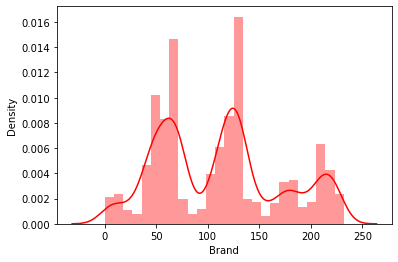

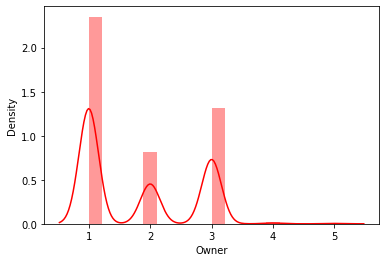

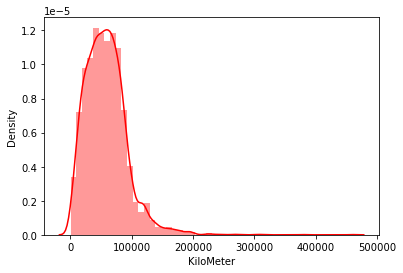

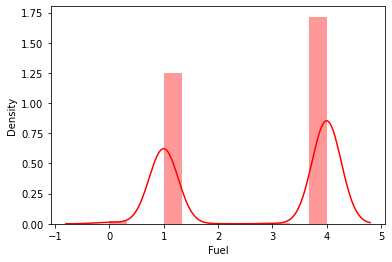

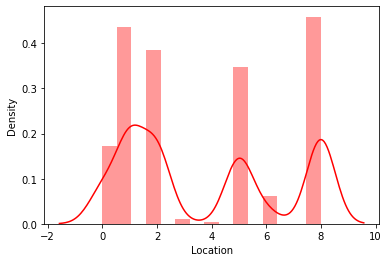

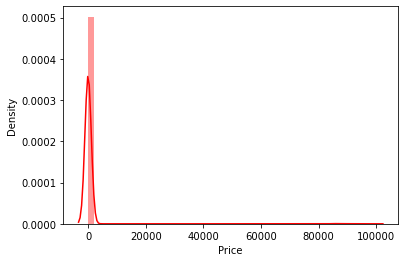

In [61]:
for i in df.columns:
    plt.figure()
    sns.distplot(df[i],color ='red')

for i in df.columns:
    plt.figure()
    sns.histplot(df[i],color ='orange')

In [ ]:
# Scatter plot for numerical features
num_features = ["Price", "Transmission", "Year_of_purchase"]
sns.pairplot(df[num_features], size = 2.5)
plt.show();

# Describe the dataset

In [64]:
df.describe()

Brand      Varient  Transmission        Owner      KiloMeter  \
count  5493.000000  5493.000000   5493.000000  5493.000000    5493.000000   
mean    110.604224   743.701438      0.724194     1.781176   58092.966685   
std      59.311339   397.944539      0.446960     0.891713   33915.442313   
min       0.000000     0.000000      0.000000     1.000000     318.000000   
25%      60.000000   396.000000      0.000000     1.000000   33865.000000   
50%     115.000000   811.000000      1.000000     1.000000   55100.000000   
75%     139.000000  1124.000000      1.000000     3.000000   76509.000000   
max     232.000000  1352.000000      1.000000     5.000000  460000.000000   

              Fuel  Year_of_purchase     Location         Price  
count  5493.000000       5493.000000  5493.000000   5493.000000  
mean      2.711815         18.918260     3.747497    484.412199  
std       1.494759          3.953257     2.927342   6171.600936  
min       0.000000          1.000000     0.000000      1.000000  
25%       1.000000         16.000000     1.000000      3.650000  
50%       4.000000         20.000000     2.000000      5.300000  
75%       4.000000         23.000000     6.000000      8.150000  
max       4.000000         23.000000     8.000000  99000.000000

<AxesSubplot:>

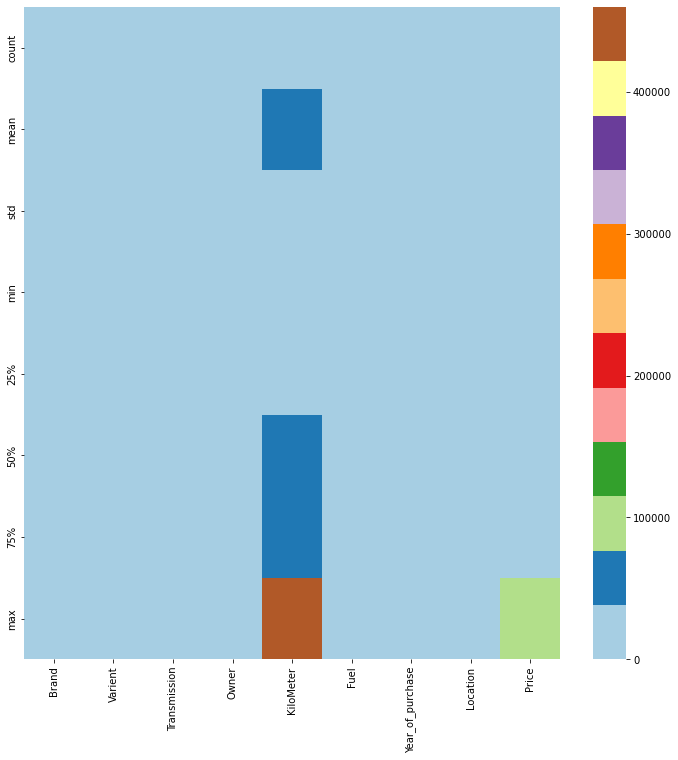

In [66]:
plt.figure(figsize= (12,12))
sns.heatmap(df.describe(),cmap = "Paired")

# Correlation

In [67]:
df.corr()

Brand   Varient  Transmission     Owner  KiloMeter  \
Brand             1.000000 -0.056362      0.068386 -0.035852   0.106632   
Varient          -0.056362  1.000000      0.108723  0.067767  -0.047597   
Transmission      0.068386  0.108723      1.000000  0.094788   0.126330   
Owner            -0.035852  0.067767      0.094788  1.000000   0.022542   
KiloMeter         0.106632 -0.047597      0.126330  0.022542   1.000000   
Fuel             -0.107557  0.076681      0.047803  0.144339  -0.364543   
Year_of_purchase -0.049301  0.036977     -0.008639  0.390272  -0.248096   
Location          0.031818 -0.019452     -0.063395 -0.185652   0.021170   
Price             0.018685 -0.001753      0.043803  0.044700   0.049311   

                      Fuel  Year_of_purchase  Location     Price  
Brand            -0.107557         -0.049301  0.031818  0.018685  
Varient           0.076681          0.036977 -0.019452 -0.001753  
Transmission      0.047803         -0.008639 -0.063395  0.043803  
Owner             0.144339          0.390272 -0.185652  0.044700  
KiloMeter        -0.364543         -0.248096  0.021170  0.049311  
Fuel              1.000000          0.045407 -0.057830  0.056436  
Year_of_purchase  0.045407          1.000000 -0.153916 -0.160061  
Location         -0.057830         -0.153916  1.000000  0.018457  
Price             0.056436         -0.160061  0.018457  1.000000

<AxesSubplot:>

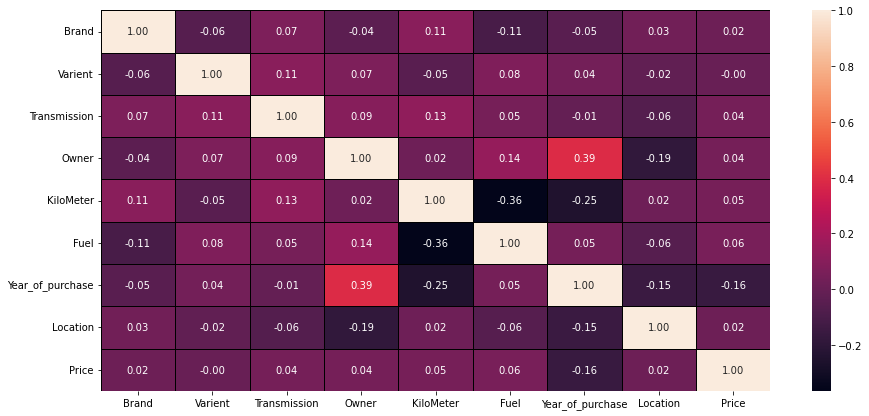

In [68]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')


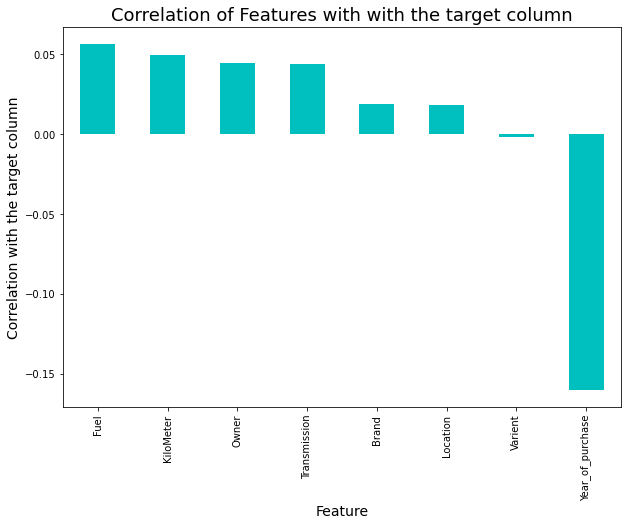

In [69]:
plt.figure(figsize=(10,7))
df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Correlation with the target column',fontsize=14)
plt.title('Correlation of Features with with the target column',fontsize=18)
plt.show()


Varient column has 0 correlation with target column and some column has same correlation hence muliticollinearity is present

In [73]:
dfy1=df.iloc[:,-1:]
dfy1

Price
0      3.50
1      6.99
2      5.53
3      7.64
4      2.94
...     ...
5488   6.50
5489  13.50
5490   4.85
5491   1.50
5492   6.25

[5493 rows x 1 columns]

In [74]:
dfx1=df.copy()
dfx1.drop("Price",axis=1,inplace=True)
dfx1

Brand  Varient  Transmission  Owner  KiloMeter  Fuel  Year_of_purchase  \
0       120      518             1      3      45347     4                23   
1       225      220             1      3      97922     1                23   
2        45      991             1      3      59642     4                23   
3        49     1323             1      3      89144     4                23   
4       132     1166             1      3     131125     4                23   
...     ...      ...           ...    ...        ...   ...               ...   
5488    182      593             0      1      50000     4                16   
5489    184      768             0      2      60200     1                18   
5490    212      405             1      1     174855     1                12   
5491    112      888             1      2     225000     4                15   
5492     68      293             1      1      92207     4                18   

      Location  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
5488         8  
5489         8  
5490         8  
5491         8  
5492         8  

[5493 rows x 8 columns]

In [75]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [76]:
def calc_vif(dfx1):
    vif=pd.DataFrame()
    vif['variables']=dfx1.columns
    vif['VIF_Factor']=[variance_inflation_factor(dfx1.values,i) for i in range(dfx1.shape[1])]
    return(vif)

In [77]:
calc_vif(dfx1)

variables  VIF_Factor
0             Brand    4.258431
1           Varient    4.366486
2      Transmission    3.766660
3             Owner    6.338445
4         KiloMeter    3.862020
5              Fuel    4.367776
6  Year_of_purchase   13.533362
7          Location    2.523540

Year_of_purchase is having high vif---> 13.533362 hence we drop it

In [80]:
dfx1.drop(["Year_of_purchase"],axis=1,inplace=True)

In [81]:
calc_vif(dfx1)

variables  VIF_Factor
0         Brand    3.878849
1       Varient    4.039326
2  Transmission    3.711929
3         Owner    4.677509
4     KiloMeter    3.787423
5          Fuel    3.981899
6      Location    2.408872

# Skewness

In [82]:
df.skew()

Brand            0.337374
Varient         -0.285219
Transmission    -1.003562
Owner            0.527235
KiloMeter        1.551664
Fuel            -0.310809
Location         0.350947
Price           13.276935
dtype: float64

some outliers are present

# Now we use subplot and displot to check data are normalised or not

In [83]:
df.columns

Index(['Brand', 'Varient', 'Transmission', 'Owner', 'KiloMeter', 'Fuel',
       'Location', 'Price'],
      dtype='object')

In [84]:
import itertools

cols = ['Brand', 'Varient', 'Transmission', 'Owner', 'KiloMeter', 'Fuel',
       'Location', 'Price']
length = len(cols)
cs = ["b","r","g","c","m","k","lime","b"]
fig = plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

**Plotting the Outliers**

Brand              AxesSubplot(0.125,0.816017;0.110714x0.0639831)
Varient         AxesSubplot(0.257857,0.816017;0.110714x0.0639831)
Transmission    AxesSubplot(0.390714,0.816017;0.110714x0.0639831)
Owner           AxesSubplot(0.523571,0.816017;0.110714x0.0639831)
KiloMeter       AxesSubplot(0.656429,0.816017;0.110714x0.0639831)
Fuel            AxesSubplot(0.789286,0.816017;0.110714x0.0639831)
Location           AxesSubplot(0.125,0.739237;0.110714x0.0639831)
Price           AxesSubplot(0.257857,0.739237;0.110714x0.0639831)
dtype: object

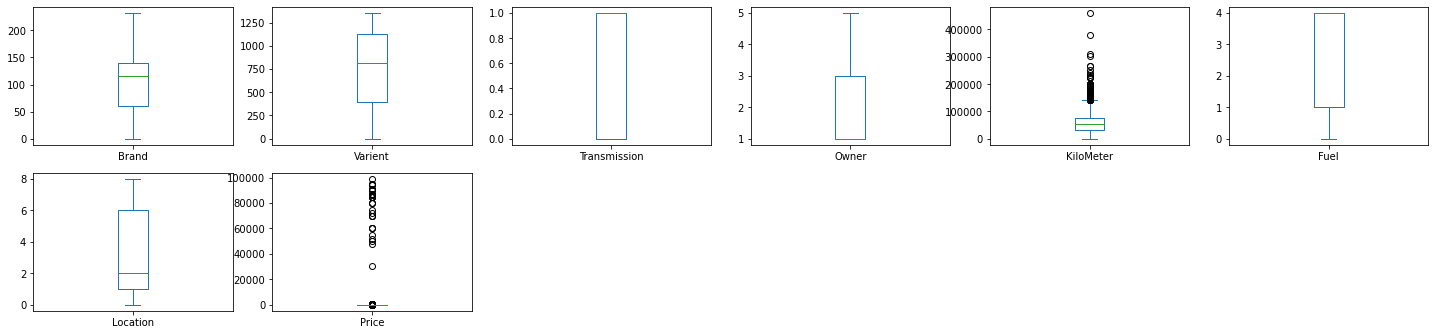

In [85]:
df.plot(kind = 'box',figsize = (25,30),layout = (10,6),sharex = False, subplots = True)

In the above plot we see KiloMeter,Year_of_purchase and Price are having outlier.

In [86]:
df['KiloMeter'] = np.sqrt(df['KiloMeter'])
df['Price'] = np.sqrt(df['Price'])
df.head(5)

Brand  Varient  Transmission  Owner   KiloMeter  Fuel  Location     Price
0    120      518             1      3  212.948351     4         0  1.870829
1    225      220             1      3  312.924911     1         0  2.643861
2     45      991             1      3  244.217117     4         0  2.351595
3     49     1323             1      3  298.569925     4         0  2.764055
4    132     1166             1      3  362.111861     4         0  1.714643

df.drop(['Brand'],axis = 1,inplace = True)
df.drop(['Location'],axis = 1,inplace = True)
df.drop(['Varient'],axis = 1,inplace = True)
df.head()

In [87]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 110,  324,  405,  416,  436,  442,  450,  474,  474,  475, 1056,
        1129, 1385, 1527, 1618, 1622, 1632, 1797, 2037, 2059, 2122, 2132,
        2140, 2145, 3150, 3171, 3293, 3356, 3404, 3449, 3502, 3557, 3572,
        3580, 3595, 3669, 3745, 4003, 4094, 4188, 4313, 4521, 4535, 4677,
        4694, 4811, 4822, 4867, 4888, 5080, 5097, 5237, 5291, 5383, 5417,
        5436, 5439, 5457, 5470, 5479, 5485, 5487, 5491], dtype=int64),
 array([7, 4, 7, 7, 7, 7, 7, 4, 7, 4, 4, 3, 7, 3, 4, 3, 4, 4, 7, 7, 7, 4,
        7, 4, 4, 3, 7, 3, 4, 7, 7, 7, 4, 7, 7, 3, 4, 3, 3, 7, 7, 7, 4, 7,
        4, 4, 7, 7, 7, 7, 7, 4, 7, 3, 7, 4, 4, 7, 7, 7, 7, 7, 4],
       dtype=int64))

In [88]:
df_new=df[(z<3).all(axis=1)]
df_new.head()

Brand  Varient  Transmission  Owner   KiloMeter  Fuel  Location     Price
0    120      518             1      3  212.948351     4         0  1.870829
1    225      220             1      3  312.924911     1         0  2.643861
2     45      991             1      3  244.217117     4         0  2.351595
3     49     1323             1      3  298.569925     4         0  2.764055
4    132     1166             1      3  362.111861     4         0  1.714643

In [89]:
df.shape

(5493, 8)

In [90]:
df_new.shape

(5431, 8)

In [94]:
df=df_new
df.shape

(5431, 8)

**Precentage of loss in dataset**

In [91]:
percentage_loss=((5493-5431)/5493)*100
print(percentage_loss)

1.1287092663389768


Here the data loss is less than 10 percent we can go with new dataset

### **Separating the target colunmn and feature**

In [95]:
feature=df.drop("Price",axis=1)
target=df["Price"]
x=feature
y=target

In [96]:
x.shape

(5431, 7)

In [97]:
y.shape

(5431,)

In [99]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x = mms.fit_transform(feature)
x

array([[0.51724138, 0.38313609, 1.        , ..., 0.45507271, 1.        ,
        0.        ],
       [0.96982759, 0.16272189, 1.        , ..., 0.69453877, 0.25      ,
        0.        ],
       [0.19396552, 0.73298817, 1.        , ..., 0.52996835, 1.        ,
        0.        ],
       ...,
       [0.79310345, 0.56804734, 0.        , ..., 0.53269834, 0.25      ,
        1.        ],
       [0.9137931 , 0.29955621, 1.        , ..., 0.9465922 , 0.25      ,
        1.        ],
       [0.29310345, 0.21671598, 1.        , ..., 0.67233781, 1.        ,
        1.        ]])

# Regressor Model Building:

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score

In [104]:
max_scr=0
for i in range(0,2000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print("At random state",i," The model performs very well")
        print("At random_state:-",i)
        print("Training r2_score is:-", r2_score(y_train,pred_train)*100)
        print("Testing r2_score is:-", r2_score(y_test,pred_test)*100)

At random state 581  The model performs very well
At random_state:- 581
Training r2_score is:- 43.25947128827361
Testing r2_score is:- 43.26100193486293
At random state 1673  The model performs very well
At random_state:- 1673
Training r2_score is:- 43.23779079041338
Testing r2_score is:- 43.236628521060396


In [105]:
x_train_b,x_test_b,y_train_b,y_test_b=train_test_split(x,y,random_state=581,test_size=0.20)

In [106]:
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
print("Training r2_score is:-", r2_score(y_train,pred_train)*100)
print("Testing r2_score is:-", r2_score(y_test,pred_test)*100) 

Training r2_score is:- 42.463894279708605
Testing r2_score is:- 46.38652107256158


In [107]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print('Error:')

print("mean absolute error:",mean_absolute_error(pred_test,y_test))  # no change if we interchange pred and y_test values
print("mean squared error:",mean_squared_error(pred_test,y_test))
print("root mean squared error:",np.sqrt(mean_squared_error(pred_test,y_test)))


Error:
mean absolute error: 0.5749780504787235
mean squared error: 0.6751843658631587
root mean squared error: 0.8216960300884741


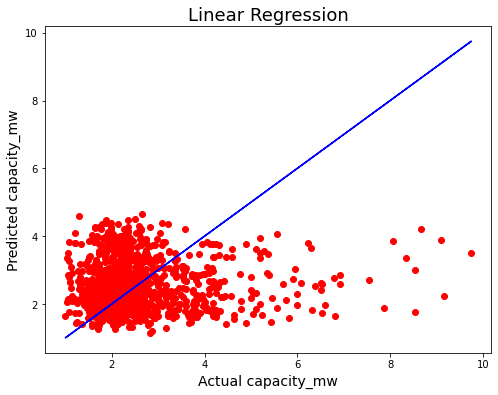

In [108]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_test, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual capacity_mw',fontsize=14)
plt.ylabel('Predicted capacity_mw',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [111]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

# Regularization


# 1. Lasso:

In [112]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [113]:
ls = Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train_b,y_train_b)
ls.score(x_train_b,y_train_b)
pred_ls = ls.predict(x_test_b)

lss = r2_score(y_test_b,pred_ls)
for j in range(2,10):
    lsscore = cross_val_score(ls,x,y,cv=j)
    lsc = lsscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",lsc*100 )
    print("R2_score is :-",lss*100)
    print("\n")

At cv:- 2
Cross validation score is:- 39.325909054182276
R2_score is :- 43.264659503748184


At cv:- 3
Cross validation score is:- 40.11180731702854
R2_score is :- 43.264659503748184


At cv:- 4
Cross validation score is:- 41.16722324985713
R2_score is :- 43.264659503748184


At cv:- 5
Cross validation score is:- 38.701918401776105
R2_score is :- 43.264659503748184


At cv:- 6
Cross validation score is:- 38.109814232025265
R2_score is :- 43.264659503748184


At cv:- 7
Cross validation score is:- 35.15235148618626
R2_score is :- 43.264659503748184


At cv:- 8
Cross validation score is:- 39.08697773951663
R2_score is :- 43.264659503748184


At cv:- 9
Cross validation score is:- 29.48438791987009
R2_score is :- 43.264659503748184




In [114]:
print("At cv:-",4)
print("Cross validation score is:-",41.167 )
print("R2_score is :-",43.264)

At cv:- 4
Cross validation score is:- 41.167
R2_score is :- 43.264


In [115]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,pred_ls))
print('Mean Squared Error:',mean_squared_error(y_test_b,pred_ls))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test_b,pred_ls)))

Error:
Mean Absolute Error: 0.5841873378528056
Mean Squared Error: 0.7337145861339743
Root Mean Square Error: 0.8565714133298953


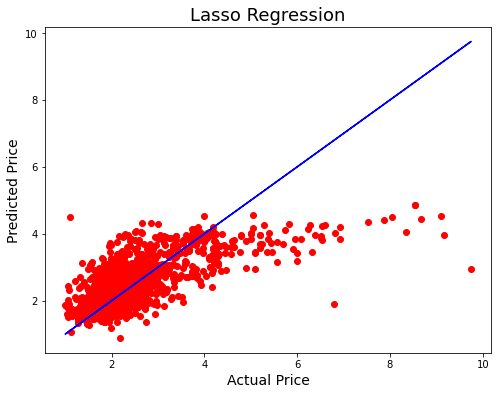

In [120]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_ls, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Price',fontsize=14)
plt.ylabel('Predicted Price',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

# 2. Ridge Regression

In [117]:
from sklearn.linear_model import Ridge

parameters = {'alpha':[.0001, .001, .01, .1, 1],'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'tol':[0.001,0.01,0.1],'random_state':[0,1,2,3,4,5,6,7,8,9]}
rd = Ridge()
clf = GridSearchCV(rd,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

{'alpha': 0.001, 'copy_X': True, 'fit_intercept': True, 'normalize': True, 'random_state': 0, 'tol': 0.001}


In [118]:
rd = Ridge(alpha=0.001, copy_X= True, fit_intercept= True, normalize=True, random_state= 0, tol= 0.001)
rd.fit(x_train_b,y_train_b)
rd.score(x_train_b,y_train_b)
pred_rd = rd.predict(x_test_b)

rds = r2_score(y_test_b,pred_rd)
print('R2 Score:',rds*100)

rdscore = cross_val_score(rd,x,y,cv=4)
rdc = rdscore.mean() 
print('Cross Val Score:',rdc*100)

R2 Score: 43.26074776977917
Cross Val Score: 41.162648085552


In [119]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,pred_rd))
print('Mean Squared Error:',mean_squared_error(y_test_b,pred_rd))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test_b,pred_rd)))

Error:
Mean Absolute Error: 0.5842105841812971
Mean Squared Error: 0.7337651735852003
Root Mean Square Error: 0.8566009418540236


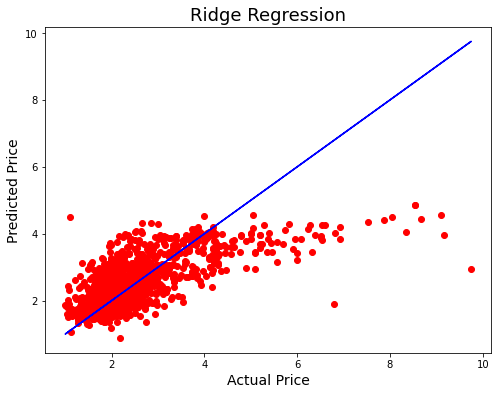

In [121]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_rd, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Price',fontsize=14)
plt.ylabel('Predicted Price',fontsize=14)
plt.title('Ridge Regression',fontsize=18)
plt.show()


# Ensemble Techniques:

In [122]:
from sklearn.tree import DecisionTreeRegressor

parameters = {'criterion':['mse', 'friedman_mse', 'mae'], 'splitter':['best', 'random']}
dt =DecisionTreeRegressor()
clf = GridSearchCV(dt,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

{'criterion': 'mse', 'splitter': 'best'}


In [127]:
dt = DecisionTreeRegressor(criterion='mse', splitter='best')
dt.fit(x_train_b, y_train_b)
dt.score(x_train_b, y_train_b)
pred_decision = dt.predict(x_test_b)

dts = r2_score(y_test_b,pred_decision)
print('R2 Score:',dts*100)

dtscore = cross_val_score(dt,x,y,cv=4)
dtc = dtscore.mean() 
print('Cross Val Score:',dtc*100)

R2 Score: 62.95001001355796
Cross Val Score: 50.68762608815246


In [124]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,pred_decision))
print('Mean Squared Error:',mean_squared_error(y_test_b,pred_decision))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(y_test_b,pred_decision)))

Error:
Mean Absolute Error: 0.33172821436022876
Mean Squared Error: 0.45008991913245755
Root Mean Square Error: 0.6708874116664119


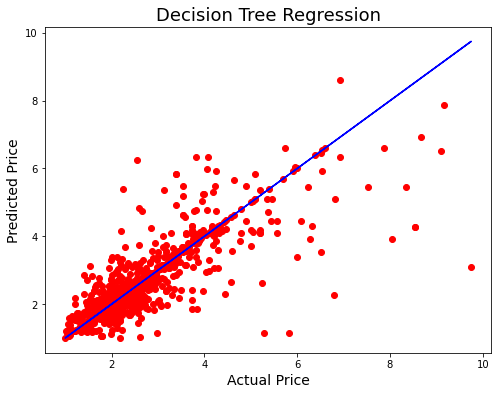

In [125]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_decision, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Price',fontsize=14)
plt.ylabel('Predicted Price',fontsize=14)
plt.title('Decision Tree Regression',fontsize=18)
plt.show()

In [126]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
parameters = {'loss' : ['ls', 'lad', 'huber', 'quantile'],'n_estimators':[50,100,200],'criterion':['friedman_mse', 'mse']}
gbr=GradientBoostingRegressor()
clf = GridSearchCV(gbr,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

{'criterion': 'friedman_mse', 'loss': 'ls', 'n_estimators': 200}


In [128]:
from sklearn.ensemble import GradientBoostingRegressor
gbr= GradientBoostingRegressor(criterion='friedman_mse',loss='ls',n_estimators=200)
gbr.fit(x_train_b, y_train_b)
gbr.score(x_train_b, y_train_b)
pred_random = gbr.predict(x_test_b)

gbrs= r2_score(y_test_b,pred_random)
print('R2 Score:',gbrs*100)

gbscore = cross_val_score(gbr,x,y,cv=4)
gbrc= gbscore.mean() 
print('Cross Val Score:',gbrc*100)

R2 Score: 75.32104078138593
Cross Val Score: 71.89073862192927


In [129]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_random, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Price ',fontsize=14)
plt.ylabel('Predicted Price',fontsize=14)
plt.title('Gradient Boost regressor',fontsize=18)
plt.show()

In [130]:
import xgboost
print(xgboost.__version__)

1.4.2


In [131]:
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor


In [145]:
xgb = XGBRegressor()
xgb = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
xgb.fit(x_train_b, y_train_b)
xgb.score(x_train_b, y_train_b)
pred_random = xgb.predict(x_test_b)

xgbs= r2_score(y_test_b,pred_random)
print('R2 Score:',xgbs*100)
#cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
xgbscore = cross_val_score(xgb,x,y,cv=4)
xgbc= xgbscore.mean() 
print('Cross Val Score:',xgbc*100)




R2 Score: 85.9481298836461
Cross Val Score: 78.24594469185998


In [133]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_random, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Price',fontsize=14)
plt.ylabel('Predicted Price',fontsize=14)
plt.title('XGBRegressor',fontsize=18)
plt.show()

In [135]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=2)
knr.fit(x_train_b,y_train_b)
print("KNR score:",knr.score(x_train_b,y_train_b))

knr_pred=knr.predict(x_test_b)
knrs= r2_score(y_test_b,knr_pred)
print('R2 Score:',knrs*100)
knrscore = cross_val_score(knr,x,y,cv=4)
knrc= knrscore.mean() 
print('Cross Val Score:',knrc*100)


KNR score: 0.8825250706201503
R2 Score: 58.57470782394406
Cross Val Score: 43.79752946300961


In [136]:
print("Mean Squared error:",mean_squared_error(y_test_b,knr_pred))
print("Root Mean Squared error:",np.sqrt(mean_squared_error(y_test_b,knr_pred)))

Mean Squared error: 0.5357214892619149
Root Mean Squared error: 0.7319299756547172


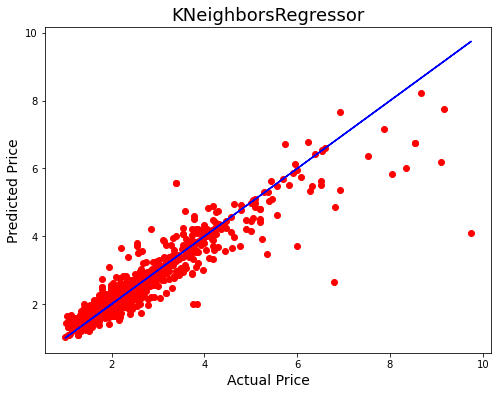

In [137]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_random, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Price',fontsize=14)
plt.ylabel('Predicted Price',fontsize=14)
plt.title('KNeighborsRegressor',fontsize=18)
plt.show()

In [138]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train_b,y_train_b)
print("SVR score:",svr.score(x_train_b,y_train_b))

svr_pred=svr.predict(x_test_b)
svrs= r2_score(y_test_b,svr_pred)
print('R2 Score:',svrs*100)
svrscore = cross_val_score(svr,x,y,cv=5)
svrc= svrscore.mean() 
print('Cross Val Score:',svrc*100)

SVR score: 0.5562626852775667
R2 Score: 53.098748150116435
Cross Val Score: 47.45591138680354


In [139]:
from sklearn.datasets import make_regression
from sklearn.ensemble import AdaBoostRegressor
parameters = {'n_estimators':[50,100,200],'learning_rate':[0.1,1.0,1.5],'loss' : ['linear', 'quare', 'exponential'],'random_state':[0,1,2,3,4,5,6,7,8,9]}

#parameters = {'loss' : ['ls', 'lad', 'huber', 'quantile'],'n_estimators':[50,100,200],'criterion':['friedman_mse', 'mse']}
abr=AdaBoostRegressor()
clf = GridSearchCV(abr,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 50, 'random_state': 7}


In [140]:
abr= AdaBoostRegressor(learning_rate= 0.1, loss= 'exponential', n_estimators= 50, random_state= 7)
abr.fit(x_train_b, y_train_b)
abr.score(x_train_b, y_train_b)
pred_random = abr.predict(x_test_b)

abrs= r2_score(y_test_b,pred_random)
print('R2 Score:',abrs*100)

abscore = cross_val_score(abr,x,y,cv=4)
abrc= abscore.mean() 
print('Cross Val Score:',abrc*100)

R2 Score: 51.195157324555716
Cross Val Score: 46.7068914993045


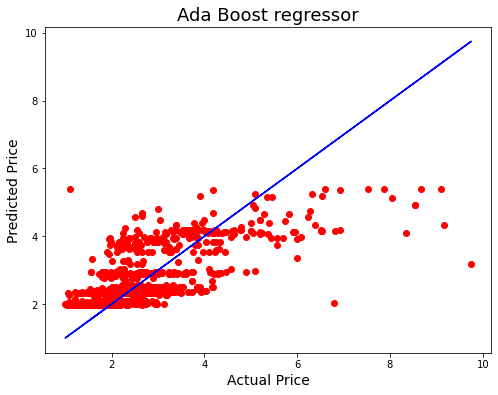

In [141]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_random, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Price',fontsize=14)
plt.ylabel('Predicted Price',fontsize=14)
plt.title('Ada Boost regressor',fontsize=18)
plt.show()

In [142]:
from sklearn.svm import SVR

parameters = { 'kernel': ['linear', 'poly','rbf', 'sigmoid']} #'gamma': ['auto', 'scale']
sv = SVR()
clf = GridSearchCV(sv,parameters)
clf.fit(x_train_b,y_train_b)

print(clf.best_params_)

{'kernel': 'rbf'}


In [143]:
sv = SVR(kernel = 'rbf', gamma = 'auto')
sv.fit(x_train_b, y_train_b)
sv.score(x_train_b, y_train_b)
pred_vector = sv.predict(x_test_b)

svs = r2_score(y_test_b,pred_vector)
print('R2 Score:',svs*100)

svscore = cross_val_score(sv,x,y,cv=4)
svc = svscore.mean() 
print('Cross Val Score:',svc*100)

R2 Score: 48.063562877749156
Cross Val Score: 45.213130624307695


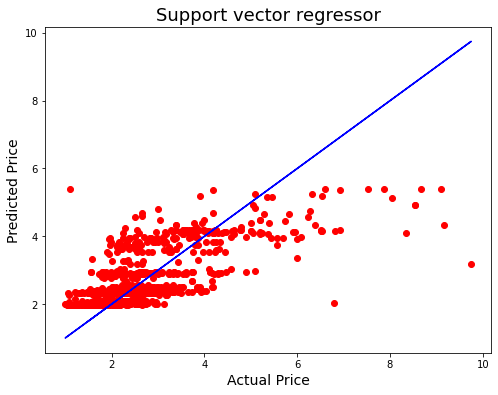

In [144]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test_b, y=pred_random, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Price',fontsize=14)
plt.ylabel('Predicted Price',fontsize=14)
plt.title('Support vector regressor',fontsize=18)
plt.show()

# The best model is XGBRegressor.
Since the difference between the percentage score of cross validation and r2_score is optimum.

R2 Score: 85.9481298836461
Cross Val Score: 78.24594469185998

# Model Saving

In [146]:
import pickle
filename = 'regressor_car_prediction.pkl'
pickle.dump(xgb,open(filename, 'wb'))

# Conclusion

In [147]:
a=np.array(y_test)
a

array([3.0724583 , 1.72626765, 2.78388218, ..., 1.93649167, 2.40831892,
       3.31662479])

In [148]:
predicted=np.array(xgb.predict(x_test))
predicted

array([3.0651612, 1.7118078, 2.7812848, ..., 1.7710592, 2.431924 ,
       3.322328 ], dtype=float32)

In [149]:
df_com=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))
df_com

original  predicted
0     3.072458   3.065161
1     1.726268   1.711808
2     2.783882   2.781285
3     4.444097   4.441316
4     2.167948   2.283029
...        ...        ...
1082  2.449490   2.449692
1083  2.387467   2.396017
1084  1.936492   1.771059
1085  2.408319   2.431924
1086  3.316625   3.322328

[1087 rows x 2 columns]

# From the above table the model is predicted the values with 85 percent accuracy